In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import accuracy_score
import random
random.seed(42)

In [20]:
km=pd.read_csv('kMeansData.csv')
km.head()

,x1,x2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [21]:
rbf=pd.read_csv('rbfClassification.csv')
rbf.head()

,x1,x2,cls
0,-2.427236,1.965984,1
1,2.382605,2.256614,0
2,-2.680668,2.379979,1
3,-2.620277,2.913823,0
4,1.513792,-2.312650,0


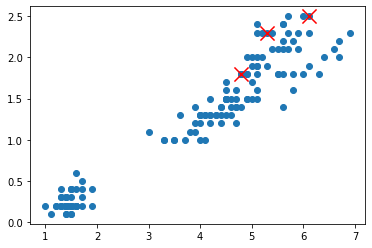

In [22]:
# Load the data
data = pd.read_csv('kMeansData.csv')

# Number of clusters
k = 3

# Select initial cluster centers randomly
centroids = data.sample(k)

# Plot the initial centroids
plt.scatter(data['x1'], data['x2'])
plt.scatter(centroids['x1'], centroids['x2'], marker='x', s=200, linewidths=3, color='r')
plt.show()

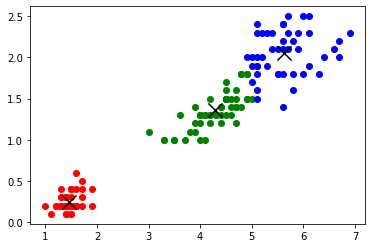

Final cluster centers:
           x1        x2
126  1.462000  0.246000
115  4.292593  1.359259
109  5.626087  2.047826


In [23]:
# Number of iterations
max_iter = 1000

# Convergence criterion
convergence_threshold = 0.001

# Keep track of iterations
iter = 0

# Keep looping until the number of iterations reaches the maximum or the convergence criterion is met
while iter < max_iter:
    # Assign each data point to the closest centroid
    distances = np.zeros((len(data), k))
    for i in range(k):
        distances[:, i] = np.sqrt((data['x1'] - centroids.iloc[i]['x1'])**2 + (data['x2'] - centroids.iloc[i]['x2'])**2)
    closest_centroids = np.argmin(distances, axis=1)
    
    # Store the previous centroid locations
    prev_centroids = centroids.copy()
    
    # Recalculate the centroid locations as the mean of the assigned data points
    for i in range(k):
        centroids.iloc[i, :] = data[closest_centroids == i].mean()
    
    # Check for convergence
    diff = np.sqrt(((centroids - prev_centroids)**2).sum().sum())
    if diff < convergence_threshold:
        break
    
    iter += 1

# Plot the final clusters
colors = ['r', 'g', 'b']
for i in range(k):
    cluster = data[closest_centroids == i]
    plt.scatter(cluster['x1'], cluster['x2'], c=colors[i])
plt.scatter(centroids['x1'], centroids['x2'], marker='x', s=200, linewidths=3, color='k')
plt.show()

# Print the final cluster centers
print("Final cluster centers:")
print(centroids)


Cluster center coordinates: [[ 1.30641042 -0.37348593]
 [-2.26014807  2.1265868 ]]


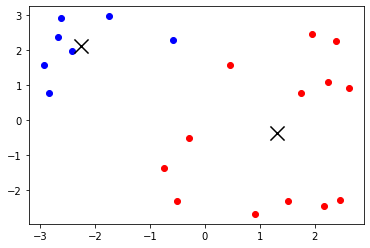

In [31]:
# Load the data from the csv file
random.seed(42)
data = pd.read_csv("rbfClassification.csv")

# Extract the input features x1 and x2
X = data[['x1', 'x2']].values

# Set the number of clusters to 2
k = 2

# Initialize and fit a k-means model on the input features
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(X)

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_
print("Cluster center coordinates:", centers)

# Plot the data points and cluster centers
colors = ['red', 'blue']
for i in range(k):
    cluster_points = X[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])
    plt.scatter(centers[i, 0], centers[i, 1], marker='x', s=200, color='black')
plt.show()


In [32]:
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 1.15803318 -1.32584965]
 [-0.81677469  2.46180488]]


In [33]:
# Load the data from the csv file
data = pd.read_csv("rbfClassification.csv")

# Extract the input features (x1 and x2) and target class (cls)
X = data[['x1', 'x2']].values
y = data['cls'].values

# Calculate the RBF kernel matrix using gamma = 0.5
gamma = 0.5
K = rbf_kernel(X, centers, gamma=gamma)

# Train an SVM with RBF kernel on the RBF kernel matrix
svm = SVC(kernel='rbf', gamma=gamma)
svm.fit(K, y)

# Predict the target class of each data point using the trained SVM
y_pred = svm.predict(K)

# Calculate the correct classification rate
accuracy = accuracy_score(y, y_pred)
print("Correct classification rate:", accuracy)

Correct classification rate: 0.75
